# Misure ripetute e inferenza bayesiana

In generale, vedremo che la presenza di più misure ripetute ha l'effetto di ridurre l'intevello di incertezza.

Partiamo sempre da una distribuzione gaussiana per una variabile $x$ con valor medio $\mu$ e deviazione standard $\sigma$.

Ma questa volta consideriamo $N$ osservazioni, o misure, $x_1, \cdots, x_N$.

La distribuzione di probabilità congiunta è:

$\displaystyle p(x_1, \cdots, x_n;\theta) = \prod_{i=1}^N p(x_i;\theta)$

Nel caso gaussiano:

$\displaystyle p(x_1, \cdots, x_n;\mu,\sigma) = \frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left[{-\sum_{i=1}^N(x_i-\mu)^2/2\sigma^2}\right]$

La distribuzione a posteriori per $\mu$ si può scrivere, se $\sigma$ è noto, come:

$\displaystyle p(\mu;x_1,\cdots,x_n) = \frac{p(x_1, \cdots, x_n;\mu,\sigma)\,\pi(\mu)}{\int p(x_1, \cdots, x_n;\mu^\prime,\sigma)\,\pi(\mu^\prime)\,\mathrm{d}\mu^\prime}$

Se assumiamo una probabilità a priori uniforme per $\mu$, ossia $\pi(\mu)=\mathrm{cost.}$, diventa:

$\displaystyle p(\mu;x_1, \cdots, x_n) = \frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left[{-\sum_{i=1}^N(x_i-\mu)^2/2\sigma^2}\right] \Biggm/ \int_{-\infty}^{+\infty} \frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left[{-\sum_{i=1}^N(x_i-\mu^\prime)^2/2\sigma^2}\right]\,\mathrm{d}\mu^\prime$

$\displaystyle = C \exp\left[{-\sum_{i=1}^N(x_i-\mu)^2/2\sigma^2}\right]$

Dove $C$ è una costante di normalizzazione.

Va notato che la forma:

$\displaystyle\Sigma=\sum_{i=1}^N(x_i-\mu)^2$

È comunque un polinomio di secondo grado in $\mu$:

$\displaystyle\Sigma=\sum_{i=1}^N(\mu^{2} - 2x_i\mu+ x_i^2) = 
N \mu^{2} - 2\mu \sum_{i=1}^N x_i + \sum_{i=1}^N x_i^2
$

In sostanza, la PDF a posteriori è ancora una gaussiana:

$\displaystyle\Sigma=
N\left(\mu^{2}  - 2\mu \frac{1}{N}\sum_{i=1}^N x_i + \frac{1}{N}\sum_{i=1}^N x_i^2
\right) = N\left(
\mu^2 - 2\mu\bar{x} - \overline{x^2}
\right)
=  N\left(
(\mu - \bar{x})^2 + (\overline{x^2} -\bar{x}^2)
\right)
$

Quindi:

$\displaystyle p(\mu;x_1, \cdots, x_n) = C \exp\left[{-(\mu - \bar{x})^2/2\sigma_{\bar{x}}^2}\right]$

avendo definito: 

$\displaystyle\sigma_{\bar{x}}^2 = \frac{1}{N}(\overline{x^2} - \bar{x}^2)$

<span style="color: blue;">L'effetto netto di avere $N$ misure, quindi, è di ridurre la varianza della PDF di un fattore $\sqrt{N}$.</span>

Il valore pià probabile di $\mu$ è $\mu=\hat{\mu} = \bar{x}$.

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math

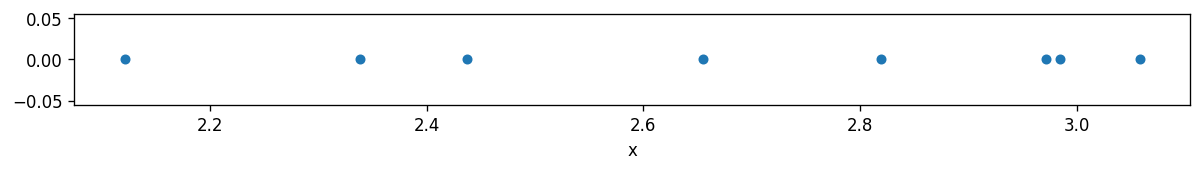

In [7]:
sigma = 0.4
mu = 2.5
x_obs = norm.rvs(loc=mu, scale=sigma, size=8)
plt.figure(figsize=(12,1), dpi=120)
plt.plot(x_obs, np.zeros(len(x_obs)), '.', markersize=10)
plt.xlabel('x')
plt.show()

Di seguito, solo a titolo di esempio, calcoliamo numericamente il prodotto degli $n$ termini gaussiano e verifichiamo che il risultato è ancora una gaussiana. 

L'algoritmo è inefficiente, ma ha solo uno scopo dimostrativo, perché lo applicheremo a casi meno banali.

In [11]:
def like(mu):
    return np.array([norm.pdf(x, loc=mu, scale=sigma) for x in x_obs]).prod()

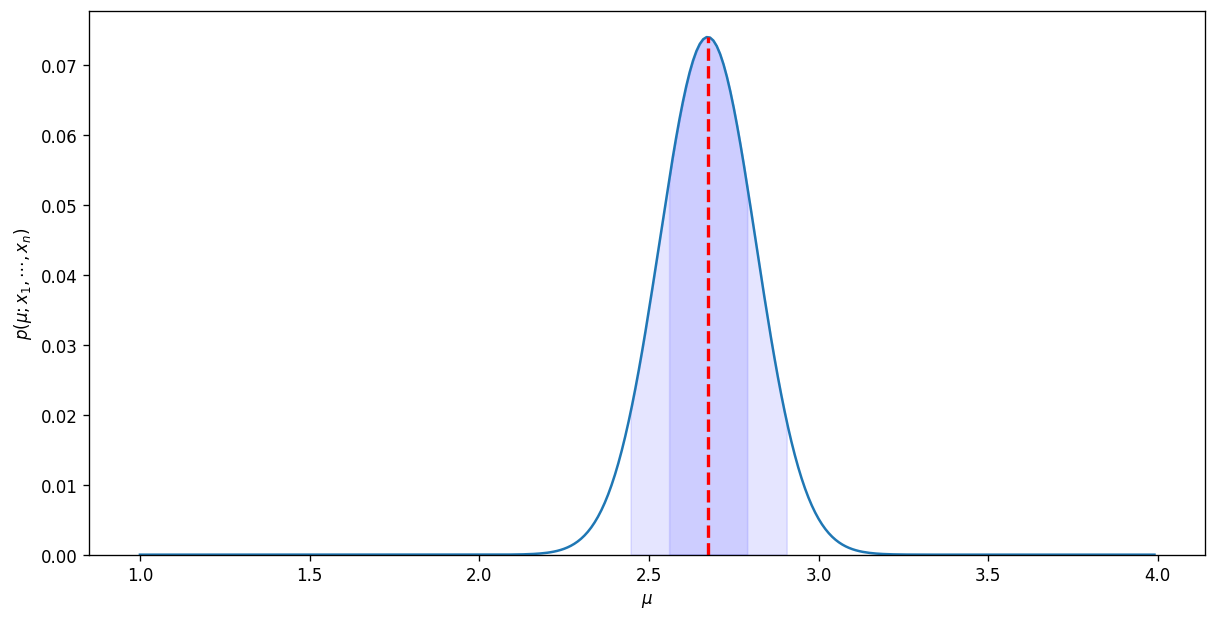

In [12]:
plt.figure(figsize=(12,6), dpi=120)
mu_range=np.arange(1, 4, 0.01)
like_v = np.vectorize(like)
plt.plot(mu_range, like_v(mu_range))
mu0 = x_obs.mean()
s0 = x_obs.std(ddof=0)/math.sqrt(len(x_obs))
x_1s = np.arange(mu0-s0, mu0+s0+.01, .01)
y_1s = like_v(x_1s)
plt.fill_between(x_1s, y_1s, alpha=0.1, color='blue')
x_2s = np.arange(mu0-2*s0, mu0+2*s0+.01, .01)
y_2s = like_v(x_2s)
plt.fill_between(x_2s, y_2s, alpha=0.1, color='blue')
plt.plot([mu0, mu0], [0,like(mu0)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(\mu;x_1,\cdots,x_n)$')
plt.show()

Avremmo potuto risparmiarci di fare il prodotto di $N$ gaussiane, che, in questa implementazione, fa solo rallentare il programa. 

## Distribuzione esponenziale

La distribuzione di probabilità congiunta, nel caso esponenziale, è:

$\displaystyle p(x_1, \cdots, x_n;\lambda) = \prod_{i=1}^N \lambda\exp\left(-\lambda x_i
\right) =
\lambda^N \exp\left(-\lambda\sum_{i=1}^N x_i
\right) =
\lambda^N \exp(-N\lambda\bar{x})
$

Un caso simile lo abbiamo già visto in precedenza.

<span style="color:red">**Nota**: se avessi definito la PDF come:</span>
    
<span style="color:red">$\displaystyle p(x;\tau) = \frac{1}{\tau} e^{-x/\tau}$</span>
    
<span style="color:red">La PDF a posteriori per $\tau$ avrebbe avuto una forma diversa. Assumere $\pi(\lambda)$ costante non equivale ad assumere $\pi(\tau)$ costante.
</span>

La PDF aposteriori, se $\pi(\lambda)$ è costante, si può scrivere come $p(x_1, \cdots, x_n;\lambda)$ normalizzata rispetto a $\lambda$.

$\displaystyle p(\lambda; x_1, \cdots, x_n;) = C\,p(x_1, \cdots, x_n;\lambda)
= C\,\lambda^N \exp(-N\lambda\bar{x})$

$C$ si può calcolare analiticamente in questo caso, oppure numericamente.

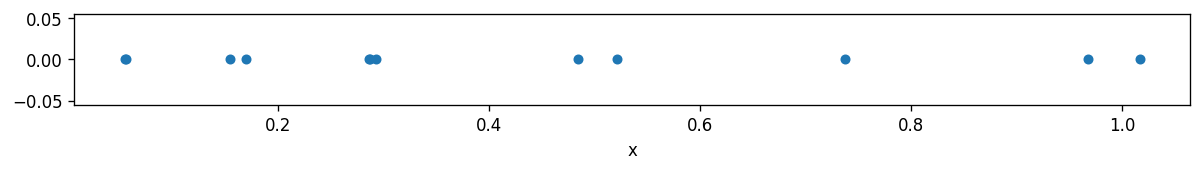

In [13]:
from scipy.stats import expon
lam = 0.4
x_obs = expon.rvs(scale=lam, size=12)
plt.figure(figsize=(12,1), dpi=120)
plt.plot(x_obs, np.zeros(len(x_obs)), '.', markersize=10)
plt.xlabel('x')
plt.show()

Gli argomenti della funzione di verosimiglianza sono definiti di seguito:

In [14]:
x_sum=x_obs.sum()
x_size = len(x_obs)
print("sum: ",x_sum)
print("size: ",x_size)

sum:  5.0255352286649355
size:  12


In [17]:
def like_exp(lam):
    return math.pow(lam,x_size)*math.exp(-lam*x_sum)

Si può dimostrare facilmente che il valore massimo è pari a:

$\hat{\lambda} = 1/\bar{x}$

Il fattore di normalizzazione $C$ si può calcolare analiticamente, ma richiede l'uso delle [funzioni $\Gamma$](https://mathworld.wolfram.com/GammaFunction.html), che è argomento alquanto tecnico dell'analisi matematica.

Proviamo a calcolare l'integrale numericamente. Non è la soluzione pià rapida, ma dovrebbe funzionare ed evitarci questi calcoli analitici. Inoltre, quando la soluzione analitica non è possibile, l'integrazione numerica resta l'unica soluzione.

In [18]:
import scipy.integrate as integrate
norm_const = integrate.quad(like_exp, 0, 12)[0]
print("norm. constant: ", norm_const)

norm. constant:  0.36725420902783357


In [19]:
def post_exp(lam):
    return like_exp(lam)/norm_const

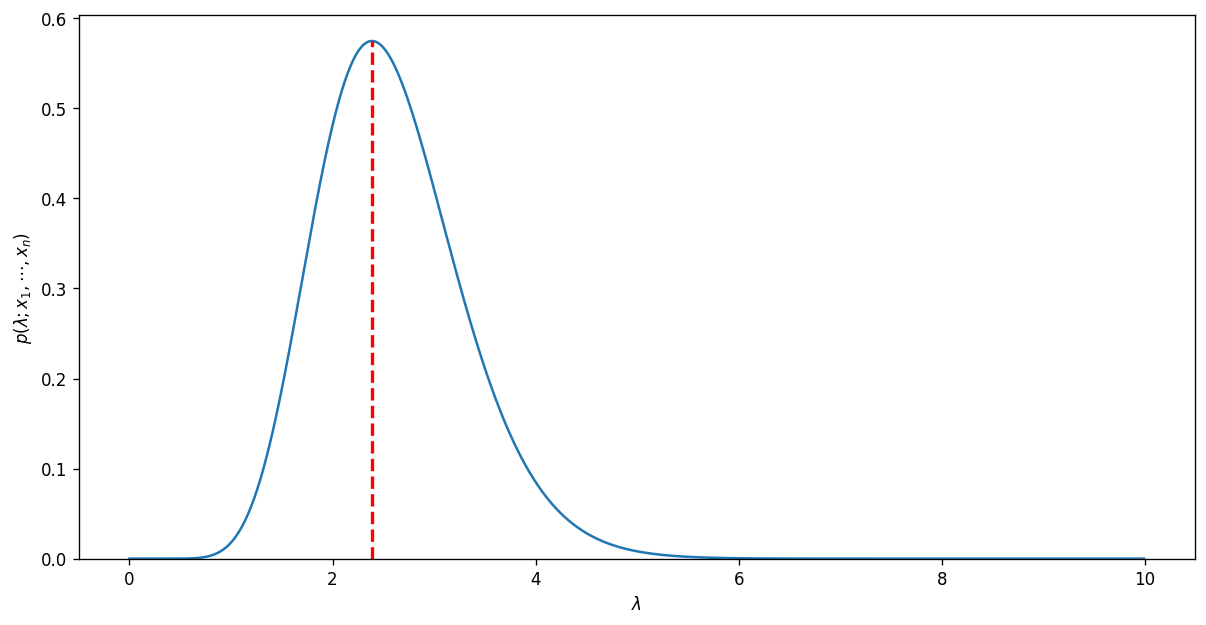

In [21]:
plt.figure(figsize=(12,6), dpi=120)
lam_range=np.arange(0, 10, 0.01)
post_exp_v = np.vectorize(post_exp)
plt.plot(lam_range, post_exp_v(lam_range))
lam0 = 1/x_obs.mean()
plt.plot([lam0,lam0], [0,post_exp(lam0)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$p(\lambda;x_1,\cdots,x_n)$')
plt.show()

Possiamo calcolare la varianza di $\lambda$ come $\sigma^2_{\lambda} = \mathbb{E}(\lambda^2) - \mathbb{E}(\lambda)^2$.
I due valori di aspettazione possono essere ancora calcolati numericamente, consideando che:

$\displaystyle \mathbb{E}[\lambda^k] = \int_0^\infty\!\! \lambda^k f(\lambda)\,\mathrm{d}\lambda$

Anche qui, soluzioni analitiche sarebbero state possibili.

In [24]:
def post_exp_1(lam):
    return lam*post_exp(lam)
def post_exp_2(lam):
    return lam*lam*post_exp(lam)

In [25]:
lam1_expt = integrate.quad(post_exp_1, 0, 12)[0]
lam2_expt = integrate.quad(post_exp_2, 0, 12)[0]
print("E(lam), E(lam^2):", lam1_expt, lam2_expt)

E(lam), E(lam^2): 2.58678914951147 7.206207188952251


In [26]:
sigma_lam = math.sqrt(lam2_expt-lam1_expt*lam1_expt)
print("sigma(lam):", sigma_lam)

sigma(lam): 0.717446224411264


Proviamo a sovrapporre una gaussiana sulla nostra PDF. Potremo provare a ripetere l'esercizio aumentando il valore di $N$. Vedremo che la PDF posterior sarà sempre più simile ad una distribuzione gaussiana.

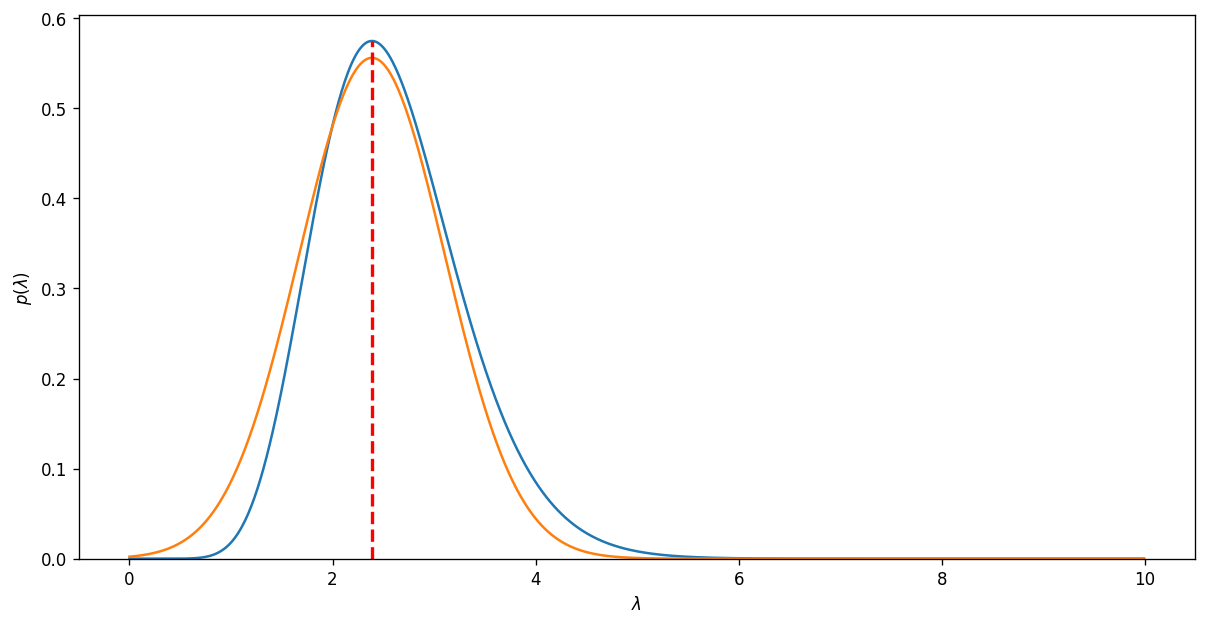

In [27]:
plt.figure(figsize=(12,6), dpi=120)
lam1, lam2, lam_step = 0, 10, 0.01
lam_range=np.arange(lam1, lam2, lam_step)
post_exp_v = np.vectorize(post_exp)
plt.plot(lam_range, post_exp_v(lam_range))
plt.plot(lam_range, norm.pdf(lam_range, loc=lam0,scale=sigma_lam))
lam0 = 1/x_obs.mean()
plt.plot([lam0,lam0], [0,post_exp(lam0)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$p(\lambda)$')
plt.show()

## Inferenza bayesiana come apprendimento

L'uso della funzione di verosimiglianza per misure ripetute permette un'interpretazione interessante dell'inferenza bayesiana:

$\displaystyle p(\theta;x_1,\cdots,x_n) = \frac{p(x_1, \cdots, x_n;\theta)\,\pi(\mu)}{\int p(x_1, \cdots, x_n;\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime}$

dove:

$\displaystyle p(x_1, \cdots, x_n;\theta) = \prod_{i=1}^N p(x_i;\theta)$

Abbiamo quindi:

$\displaystyle p(\mu;x_1,\cdots,x_n) = \frac{\prod_{i=1}^N p(x_i;\theta)\,\pi(\mu)}{\int \prod_{i=1}^N p(x_i;\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime}$

Considerando che il denominatore è solo un termine di normalizzazione, possiamo porlo uguale ad $1/C_n$:

$\displaystyle p(\mu;x_1,\cdots,x_n) = C_n\prod_{i=1}^N p(x_i;\theta)\,\pi(\mu)$

Immaginiamo di applicare questo approccio ripetutamente, prima per $x_1$, poi per $x_2$, fino ad $x_n$. Otterremo una successione di PDF ciascuna che si può ottenere dalla precedente:

$\displaystyle p^{(0)}(\mu) = C_0\pi(\mu)$

$\displaystyle p^{(1)}(\mu) = C_1p(x_1;\theta)\,\pi(\mu) = K_1p(x_1;\theta) p^{(0)}(\mu)$

$\displaystyle p^{(2)}(\mu) = C_2p(x_1, x_2;\theta)\,\pi(\mu) = K_2p(x_2;\theta) p^{(1)}(\mu)$

$\cdots$

$\displaystyle p^{(n)}(\mu) = C_np(x_1,\cdots, x_n;\theta)\,\pi(\mu) = K_np(x_n;\theta) p^{(n-1)}(\mu)$

Si può quindi considerare il processo di inferenza bayesiana come apprendimento, via via che le nuove informazioni sono incluse nel calcolo.

x_1 = 2.939
x_2 = 8.368
x_3 = 5.153
x_4 = 1.720
x_5 = 2.500
x_6 = 1.110
x_7 = 12.895
x_8 = 3.187
x_9 = 1.754
x_10 = 1.045
x_11 = 2.297
x_12 = 5.633


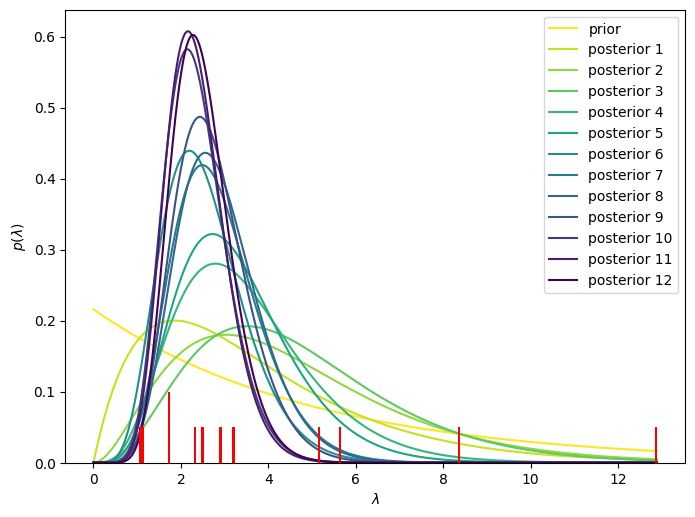

In [15]:
plt.figure(figsize=(8,6), dpi=100)
plt.hist(1./x_obs,bins=200, density=False, weights=[0.05]*len(x_obs), color='r', zorder=100)
lam1, lam2, lam_step = 0, (1./x_obs).max(), 0.01
lam_range=np.arange(lam1, lam2, lam_step)
def prior_unif(lam):
    return 1
def prior_exp(lam):
    return math.exp(-0.2*lam)
prior = prior_exp
colormap =plt.get_cmap('viridis')
colors = np.linspace(1, 0, len(x_obs)+1)
posterior = np.vectorize(prior)(lam_range)
posterior = posterior/posterior.sum()/lam_step
plt.plot(lam_range,posterior, label='prior', color=colormap(0.999))
i = 1
for x_i, c, i in zip(x_obs, colors[1:], range(1,len(x_obs)+1)):
    posterior = posterior * lam_range*np.exp(-lam_range*x_i)
    posterior = posterior/posterior.sum()/lam_step
    print('x_{:d} = {:.3f}'.format(i, 1/x_i))
    plt.plot(lam_range,posterior, label='posterior {:d}'.format(i), color=colormap(c))
plt.legend()
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$p(\lambda)$')
plt.show()

Proviamo un esempio simile con una distribuzione gaussiana

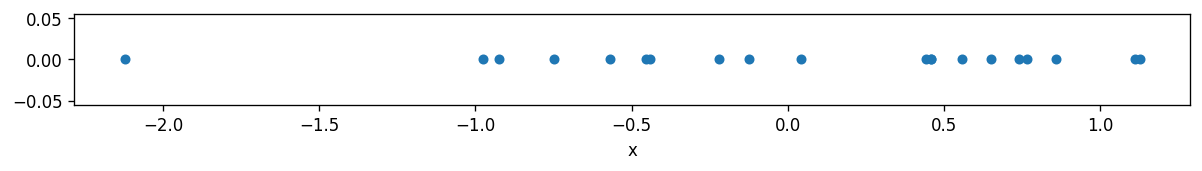

In [28]:
from scipy.stats import norm
mu = 0
x_obs = norm.rvs(size=20)
plt.figure(figsize=(12,1), dpi=120)
plt.plot(x_obs, np.zeros(len(x_obs)), '.', markersize=10)
plt.xlabel('x')
plt.show()

x_1 = -0.004
x_2 = -0.454
x_3 = 0.642
x_4 = 0.876
x_5 = -1.099
x_6 = -1.560
x_7 = -1.601
x_8 = 1.415
x_9 = 0.317
x_10 = -1.655
x_11 = -1.230
x_12 = 1.344
x_13 = -0.106
x_14 = 0.242
x_15 = 0.351
x_16 = 0.918
x_17 = 0.397
x_18 = -0.354
x_19 = -2.444
x_20 = 0.477


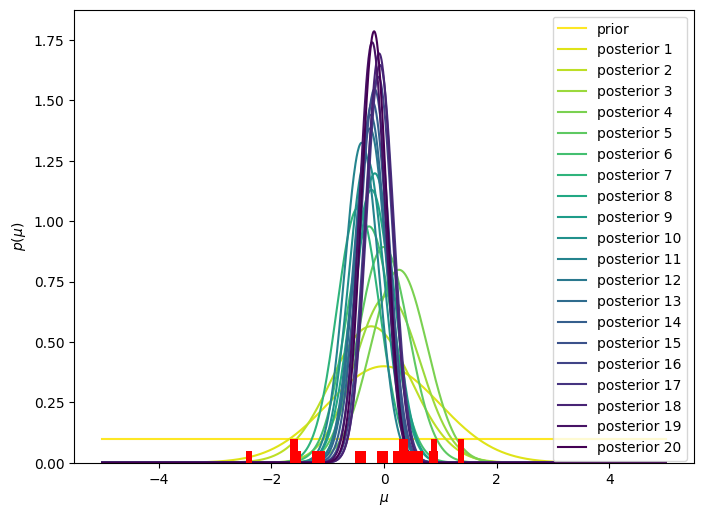

In [19]:
plt.figure(figsize=(8,6), dpi=100)
mu1, mu2, n_mu = -5, 5, 1000
mu_step = (mu2 - mu1)/n_mu
mu_range=np.linspace(mu1, mu2, n_mu)
def prior_unif(mu):
    return 1
def prior_exp(mu):
    return math.exp(-0.2*mu)
colormap = plt.get_cmap('viridis')
colors = np.linspace(1, 0, len(x_obs)+1)
posterior = np.vectorize(prior_exp)(mu_range)
posterior = posterior/posterior.sum()/mu_step
plt.plot(mu_range, posterior, label='prior', color=colormap(0.999))
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(\mu)$')
plt.legend(loc='upper right')
plt.savefig('img_out/bayesian-posterior-0.png')
for x_i, c, i in zip(x_obs, colors[1:], range(1,len(x_obs)+1)):
    plt.hist(x_obs[:i],bins=40, density=False, weights=[0.05]*len(x_obs[:i]), color='r', zorder=100)
    posterior = posterior*norm.pdf(mu_range, loc=x_i)
    posterior = posterior/posterior.sum()/mu_step
    print('x_{:d} = {:.3f}'.format(i, x_i))
    plt.plot(mu_range, posterior, label='posterior {:d}'.format(i), color=colormap(c))
    plt.legend(loc='upper right')
    plt.savefig('img_out/bayesian-posterior-{:d}.png'.format(i))
plt.show()

Possiamo comporre insieme le varie immagini con il modulo [```imageio```](https://imageio.readthedocs.io/en/stable/examples.html)

In [20]:
import imageio
with imageio.get_writer('img_out/bayesian.gif', mode='I', fps=3) as writer:
    for filename in ['img_out/bayesian-posterior-{:d}.png'.format(i) for i in range(len(x_obs)+1)]:
        image = imageio.imread(filename)
        writer.append_data(image)

<img src="img_out/bayesian.gif" width="750" align="center">

## Distribuzioni a priori informative e non informative

Se non abbiamo informazioni riguardo un parametro, dobbiamo usare una PDF a priori che non sia troppo differente tra un valore e l'altro. Una distribuzione *uniforme* esprime il massimo dell'indecisione tra i possibili valori.

Bisogna notare che una PDF costante su un intervallo infinito non è integrabile, quindi non potrebbe essere normalizzata. Lo stesso vale per altre funzioni (es.: $1/x$). Il fatto però che la PDF appare sia al numeratore che al denominatore della formula di Bayes molto spesso risolve questo problema. Si parla in questi casi di **distribuzione impropria**. Si tratta di una classe di PDF che, se trattate con rigore matematico, non possono essere funzioni ordinarie, così come la delta di Dirac.

Se invece abbiamo informazioni a priori sui possibili valori, possiamo usare una PDF che modelli il nostro grado di conoscenza sul valore vero, ovvero sull'incertezza che abbiamo.

# Spunti per esercizi
* Provare a calcolare intervalli al 68% di credibilità scegliendo un criterio per la scelta del tipo di intervallo (es.: aree uguali nelle code a sinistra e destra, intervallo centrale o altro).
* Determinare con l'inferenza bayesiana la probabilità di ottenere "testa" nel lancio di una moneta, possibilmente truccata. Trovare la distribuzione di probabilità a posteriori per successivi lanci di moneta simulati con una probabilità $p$ non necessariamente uguale a 0.5.